In [2]:
import pickle

In [3]:
pickle_path = 'mnist_v0.pkl'
with open(pickle_path, 'r') as pickle_file:
    inferece_stats = pickle.load(pickle_file)
# inferece_stats is a list, each element as output from a single process
# each output from a process is a tuple of size 2, [0]: list of accuracy, [1]: list of latencies

In [4]:
average_accuracy_per_worker = [sum(i[0]) / len(i[0]) for i in inferece_stats]
average_latencies_per_worker = [sum(i[1]) / len(i[1]) for i in inferece_stats]
all_request_accuracy = []
all_request_latency = []
for i in inferece_stats:
    all_request_accuracy.extend(i[0])
    all_request_latency.extend(i[1])


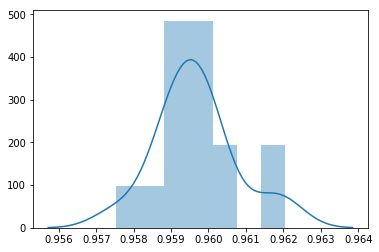

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(average_accuracy_per_worker)
# plt.title("average accuracy per worker")

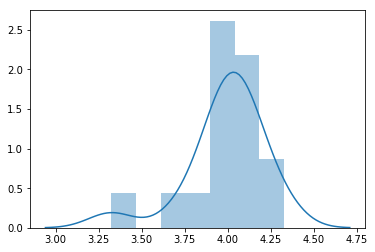

In [6]:
aggregate_latency_per_worker = [sum(i[1]) for i in inferece_stats]
sns.distplot(aggregate_latency_per_worker)

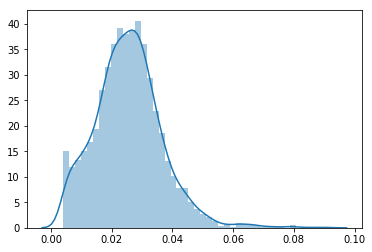

In [7]:
sns.distplot(all_request_latency)


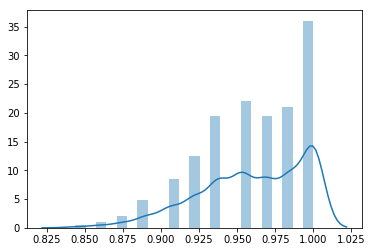

In [28]:
sns.distplot(all_request_accuracy)
